In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data and using pandas to create DataFrame
path = "../data/sierraleone-bumbuna.csv"
dataFrame = pd.read_csv(path)
print(dataFrame.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [3]:
# Printing description of the dataset
print(dataFrame.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [4]:
# Checking if there is a null value
print(dataFrame.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
# Droping Comments column because it have no value 
dataFrame = dataFrame.drop(columns=['Comments'])

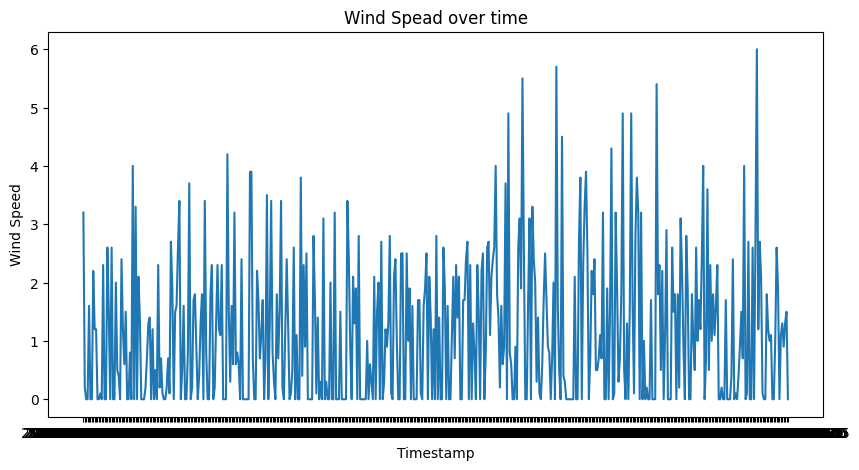

In [6]:
# Ploting graph to show Wind Speed over time
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['WS'])
plt.title('Wind Spead over time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.show()

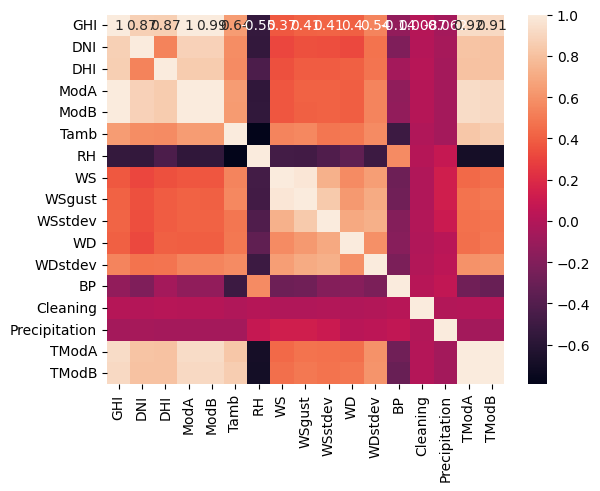

In [7]:
#  Generate and Display correlation heatmap
correlation = dataFrame.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True)
plt.show()

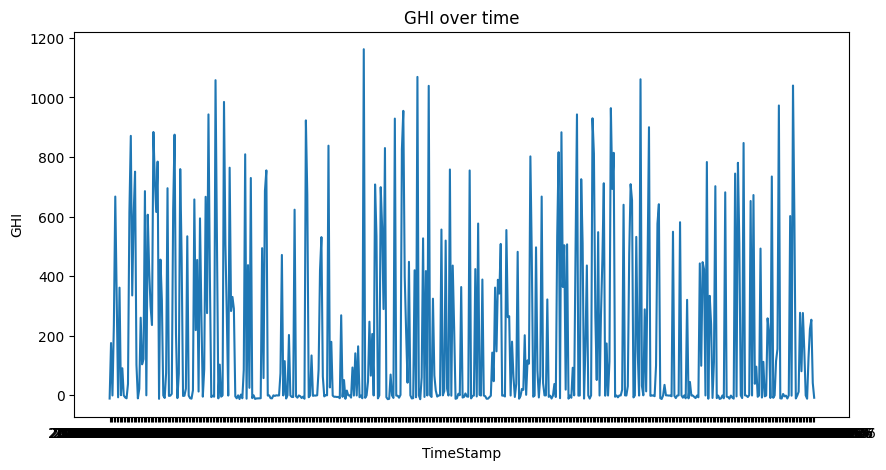

In [8]:
# Ploting graph to show Global Horizontal Irradiance over time
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['GHI'])
plt.title('GHI over time')
plt.xlabel('TimeStamp')
plt.ylabel('GHI')
plt.show()

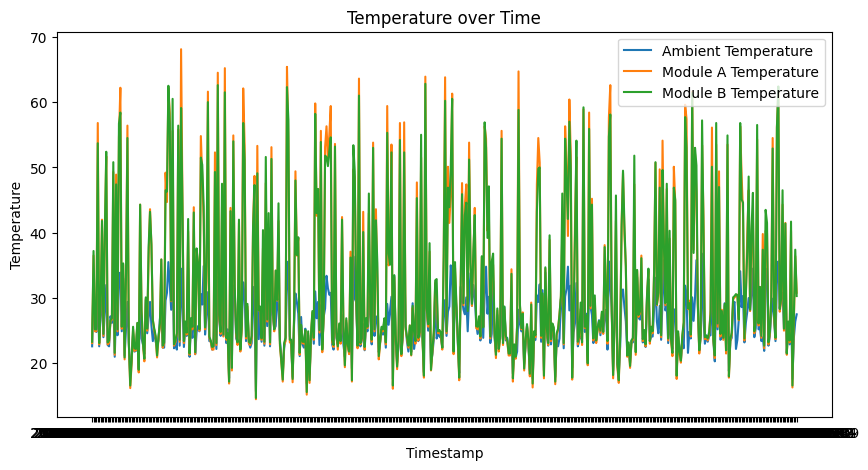

In [9]:
# Plot temperature trends from sampled data
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['Tamb'], label = 'Ambient Temperature')
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['TModA'], label = 'Module A Temperature')
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['TModB'], label = 'Module B Temperature')
plt.title("Temperature over Time")
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()

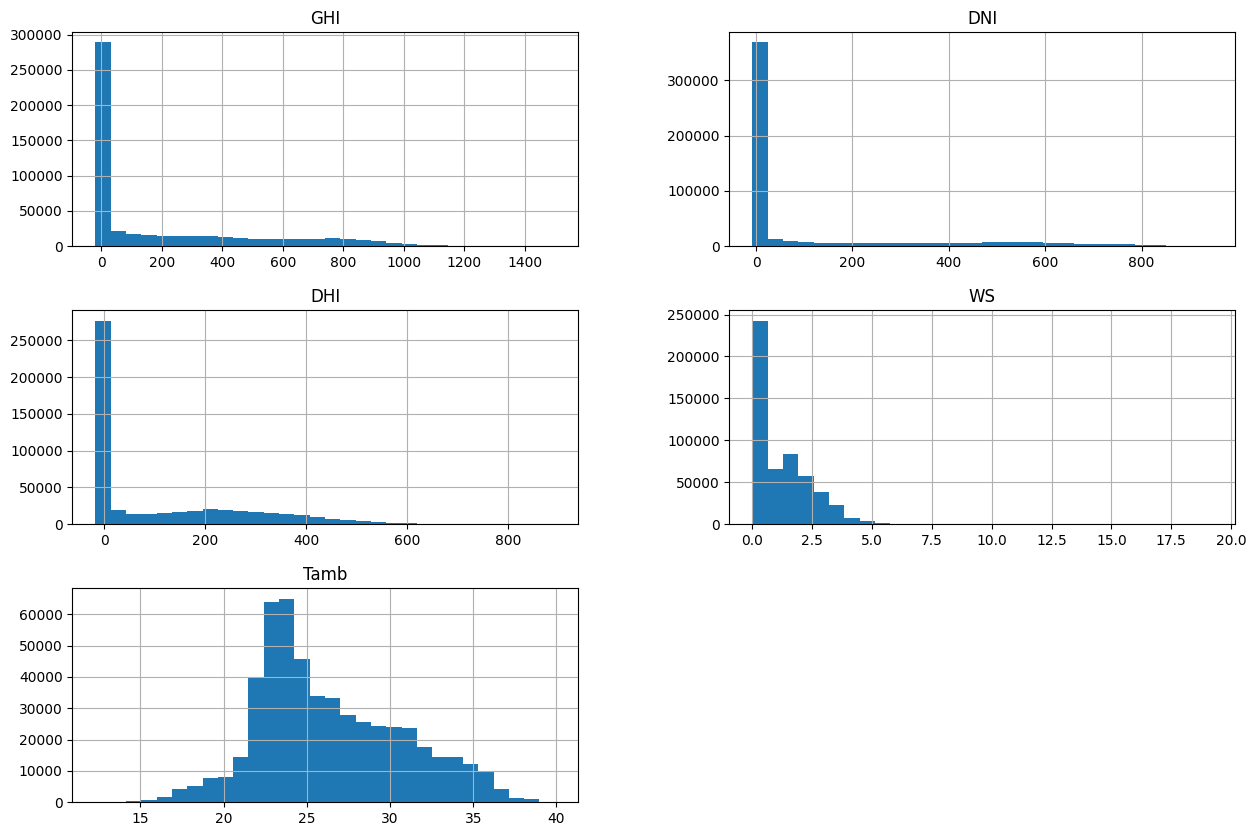

In [10]:
# Display histograms for Global Horizontal Irradiance, Direct Normal Irradiance, Diffuse Horizontal Irradiance, Wind Speed, Ambient Temperature
dataFrame[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins = 30, figsize=(15, 10))
plt.show()

d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


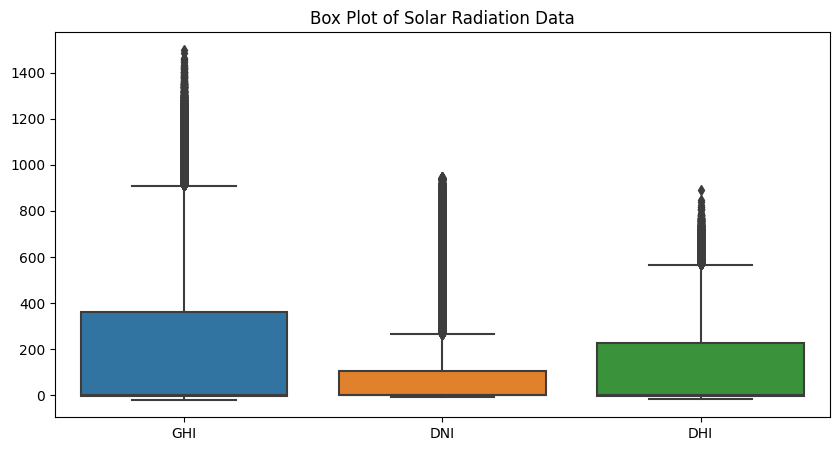

In [11]:
# Show box plot for solar radiation
plt.figure(figsize=(10, 5))
sns.boxplot(data = dataFrame[['GHI', 'DNI', 'DHI']])
plt.title('Box Plot of Solar Radiation Data')
plt.show()

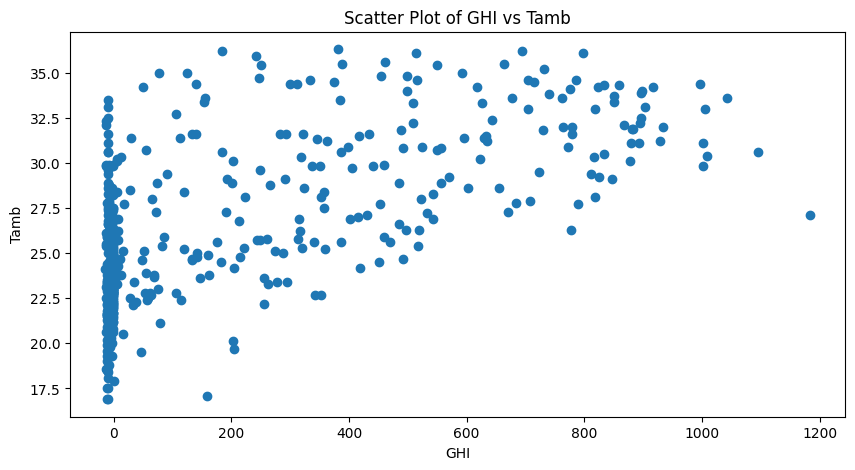

In [12]:
# Plot scatter graph of GHI vs Tamb
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.scatter(sampleDataFrame['GHI'], sampleDataFrame['Tamb'])
plt.title('Scatter Plot of GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()